<a href="https://colab.research.google.com/github/gunelatakishyeva/MachineLearningProjects/blob/main/customer_purchase_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('/content/customer_purchase_data.csv')
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


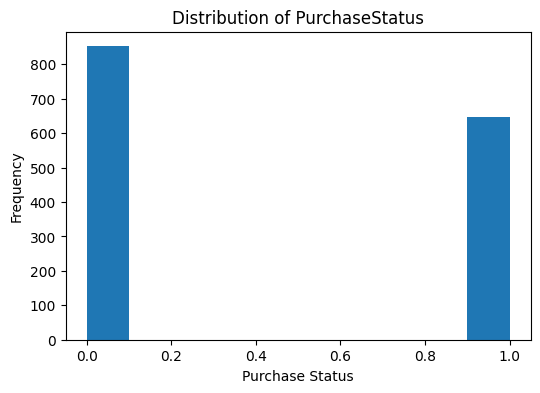

In [20]:
plt.figure(figsize=(6,4))
plt.hist(df['PurchaseStatus'])
plt.title('Distribution of PurchaseStatus')
plt.xlabel('Purchase Status')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

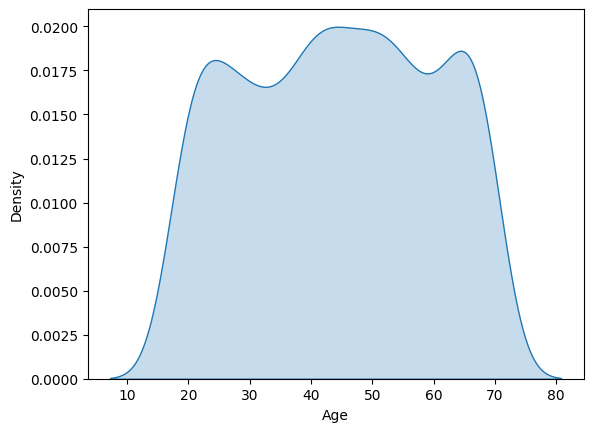

In [21]:
sns.kdeplot(df['Age'], fill=True)

<Axes: xlabel='Gender', ylabel='count'>

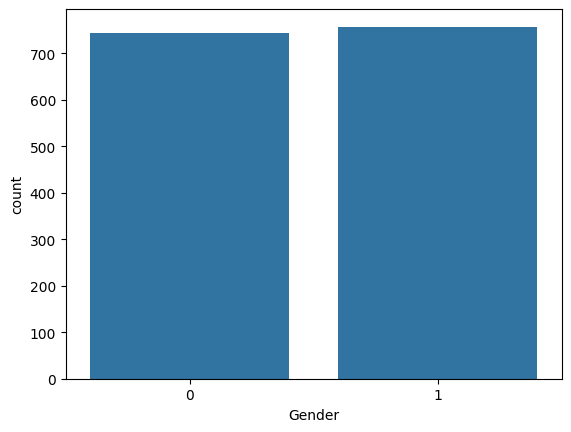

In [22]:
sns.countplot(x='Gender', data=df)

<Axes: xlabel='ProductCategory', ylabel='count'>

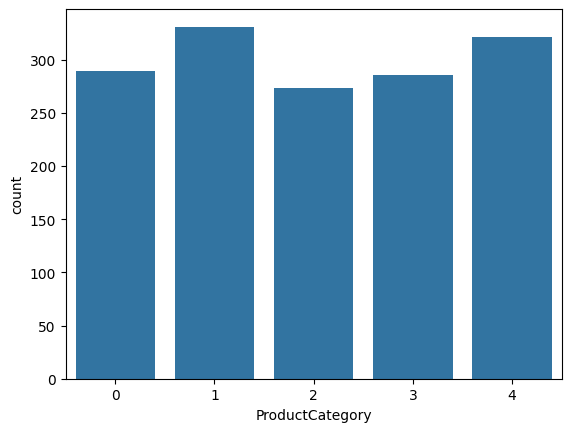

In [23]:
sns.countplot(x='ProductCategory', data=df)

<Axes: >

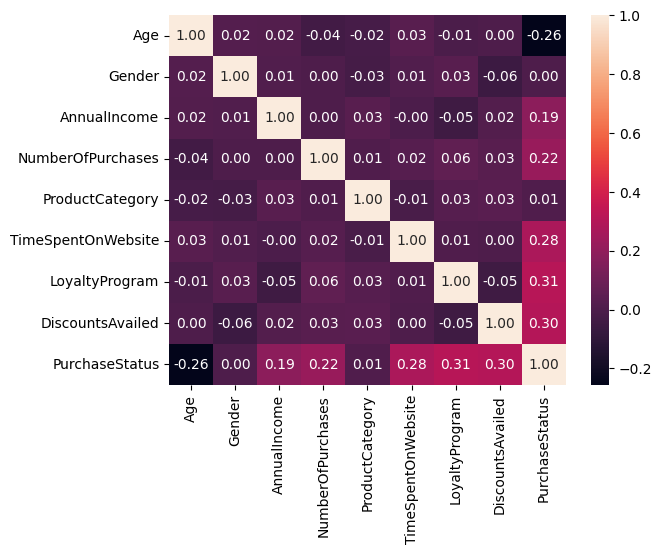

In [24]:
corr = df.corr()

sns.heatmap(corr, fmt='.2f', annot=True)

In [26]:
X=df.drop('PurchaseStatus',axis=1)
y=df['PurchaseStatus'].copy()

In [31]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [37]:
rnd_clf=RandomForestClassifier()
rnd_clf.fit(X_scaled_train,y_train)

RandomForestClassifier()

In [38]:
rnd_clf.score(X_scaled_test,y_test)

0.95

In [39]:
rnd_clf.score(X_scaled_train,y_train)

1.0

In [41]:
log_reg=LogisticRegression()
log_reg.fit(X_scaled_train,y_train)

LogisticRegression()

In [42]:
log_reg.score(X_scaled_test,y_test)

0.83

In [43]:
log_reg.score(X_scaled_train,y_train)

0.8122222222222222

In [52]:
 y_pred = rnd_clf.predict(X_test)
 y_pred2=log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


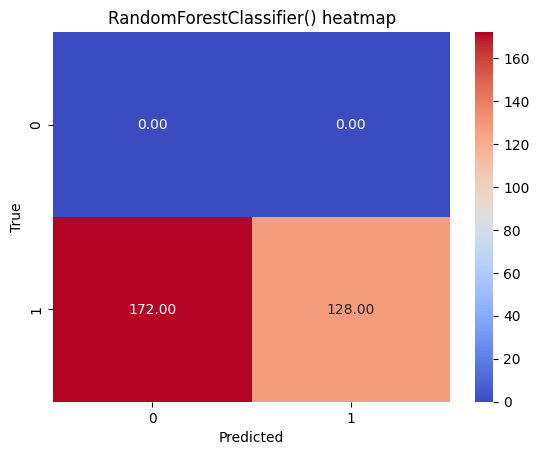

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, fmt='.2f', annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f"{rnd_clf} heatmap")
plt.show()